In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('./world_bank_data/health.csv')

In [5]:
df.head()

,country_id,country_name,indicator_name,year,value,region,incomeLevel,lendingType,longitude,latitude
0,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2024,NaN,Aggregates,Aggregates,Aggregates,NaN,NaN
1,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2023,65.146154,Aggregates,Aggregates,Aggregates,NaN,NaN
2,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2022,64.487020,Aggregates,Aggregates,Aggregates,NaN,NaN
3,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2021,62.979999,Aggregates,Aggregates,Aggregates,NaN,NaN
4,ZH,Africa Eastern and Southern,"Life expectancy at birth, total (years)",2020,63.766484,Aggregates,Aggregates,Aggregates,NaN,NaN


In [6]:
df_wide = df.pivot_table(index=['country_name','year'], columns='indicator_name', values='value')

In [9]:
corr = df_wide.corr()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

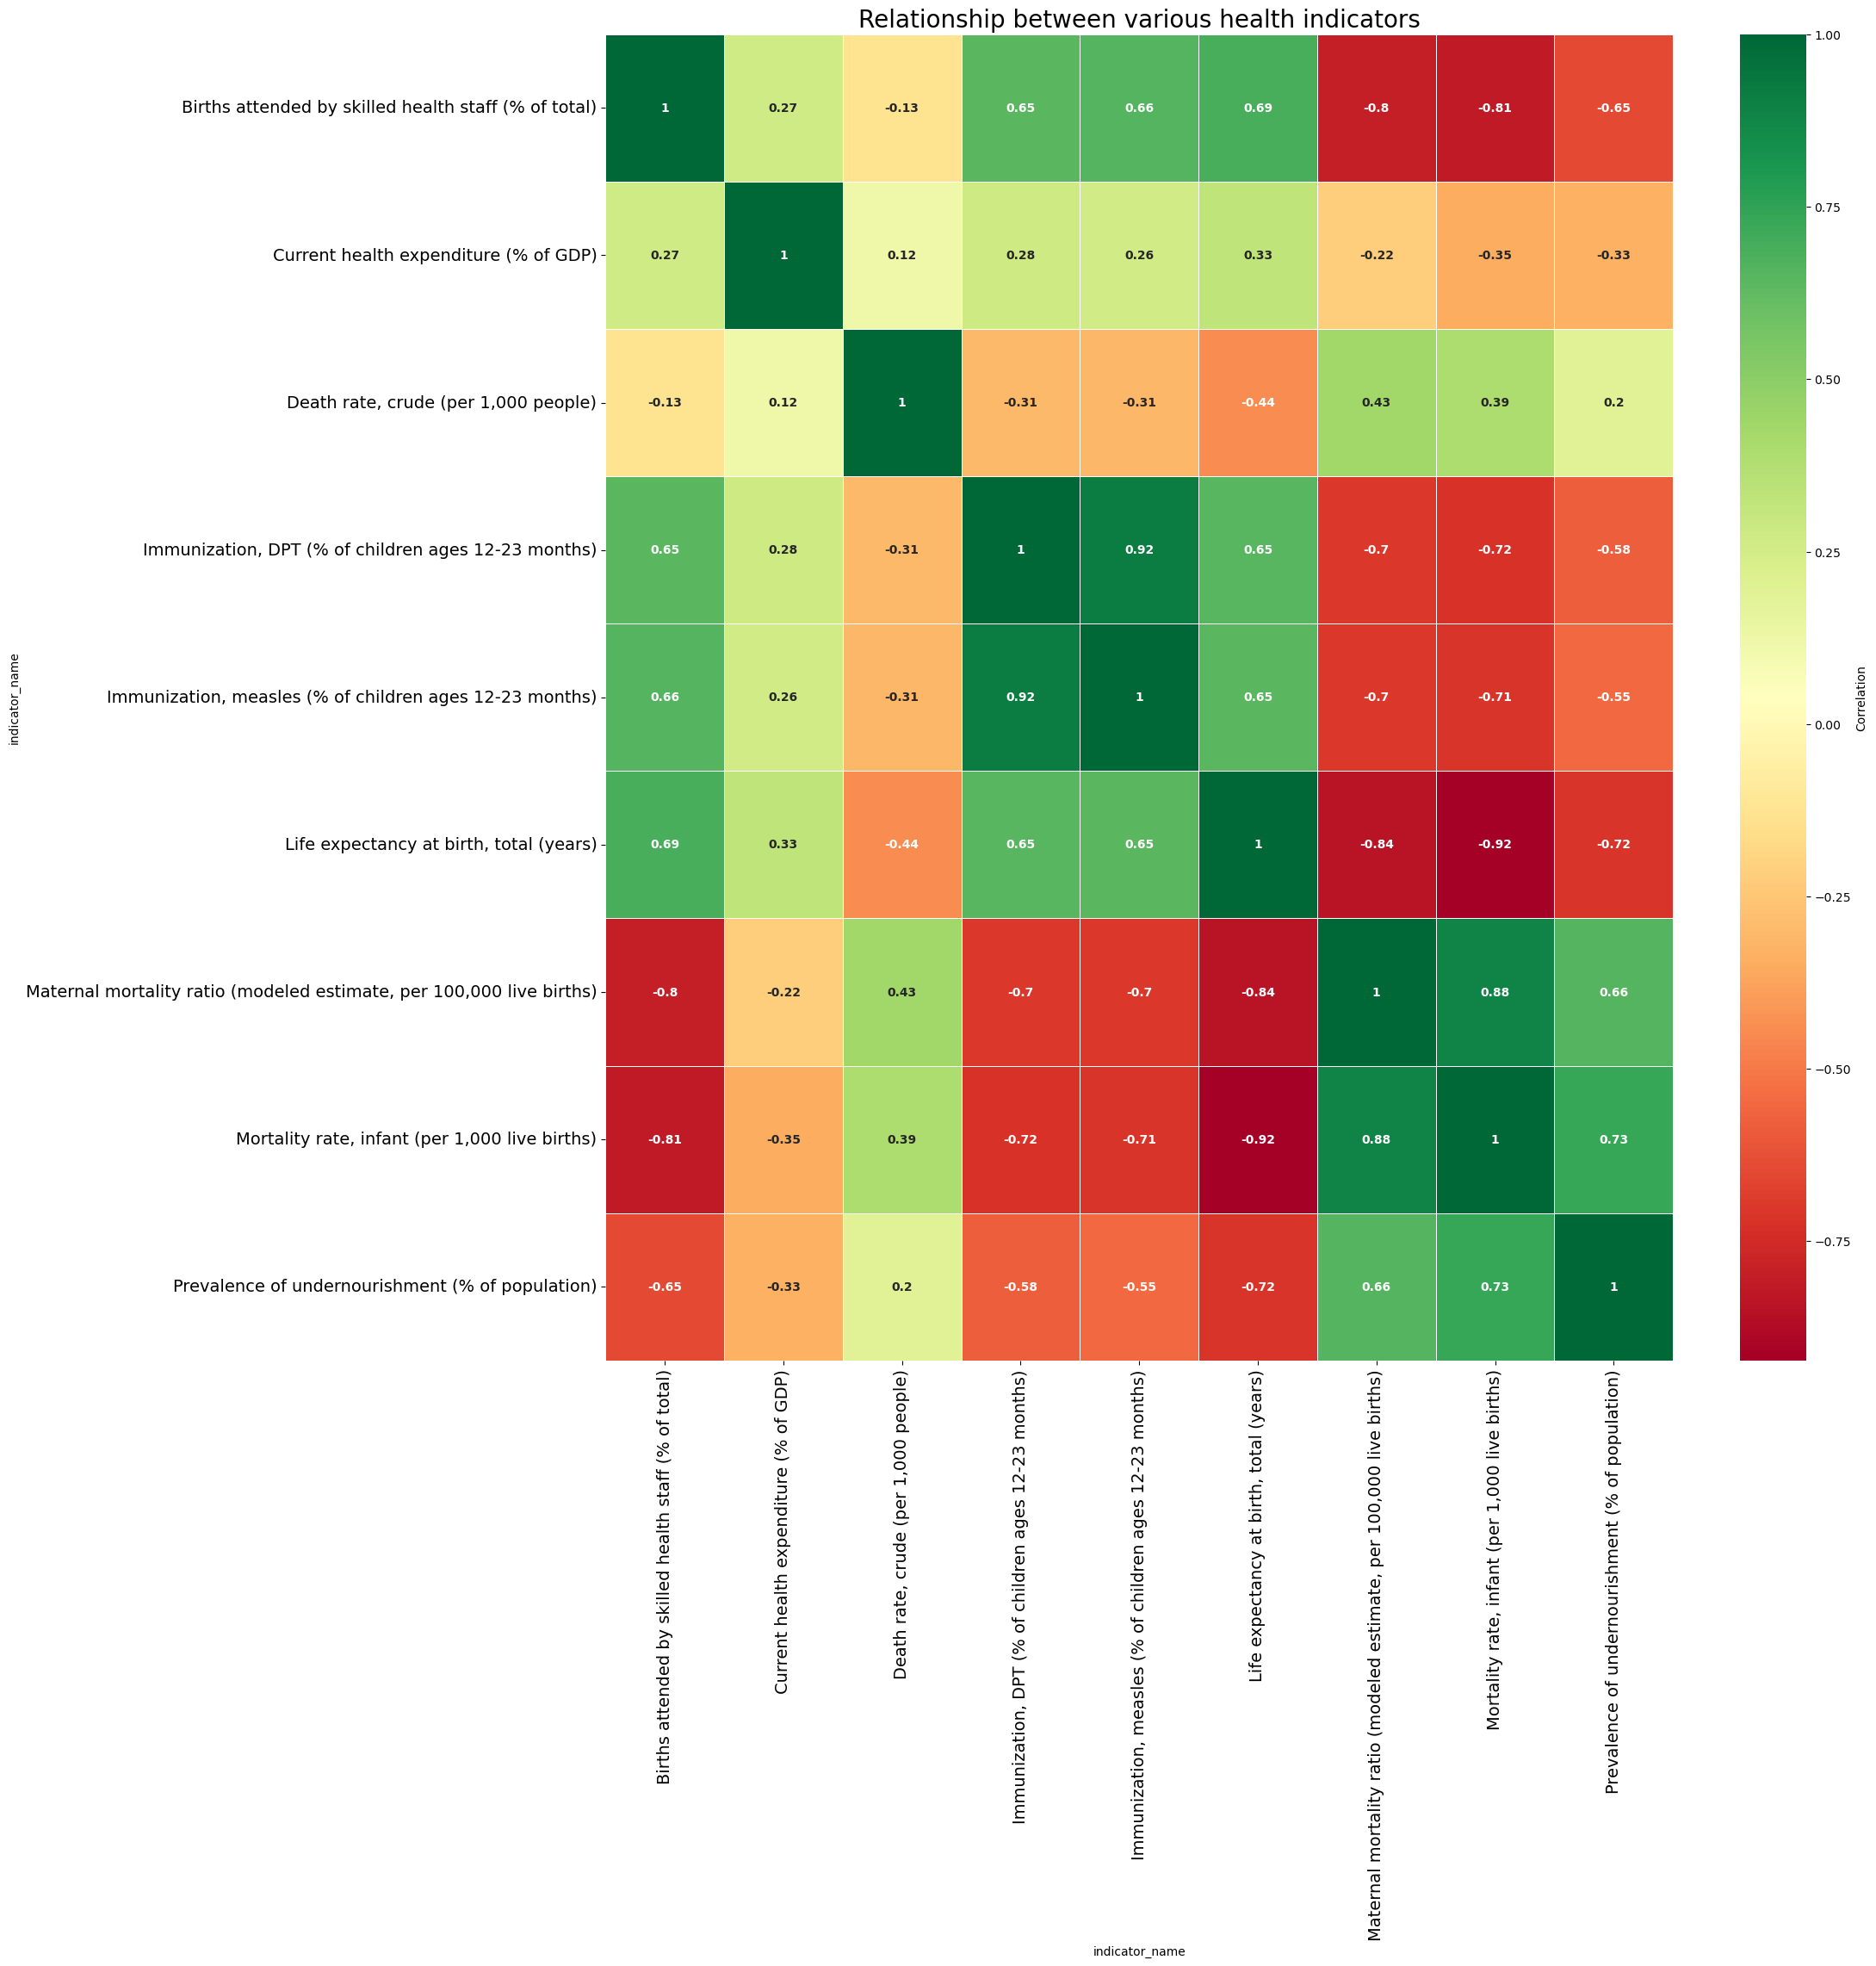

In [13]:
plt.figure(figsize=(20,20))

ax = sns.heatmap(corr, 
                 annot=True, 
                 cmap='RdYlGn', 
                 linewidths=0.5, 
                 cbar_kws={'label': "Correlation"}, 
                 annot_kws={'fontsize':10, 'fontweight':'bold'})

plt.title("Relationship between various health indicators", fontsize=20)

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.show()

In [17]:
df_pivot = df.pivot_table(index=['country_name','year'], columns='indicator_name', values='value').reset_index()

In [20]:
import plotly.express as px

In [31]:
df_plot = df_pivot[
    (df_pivot["Current health expenditure (% of GDP)"] <= 25) &
    (df_pivot["Life expectancy at birth, total (years)"] <= 90)
]


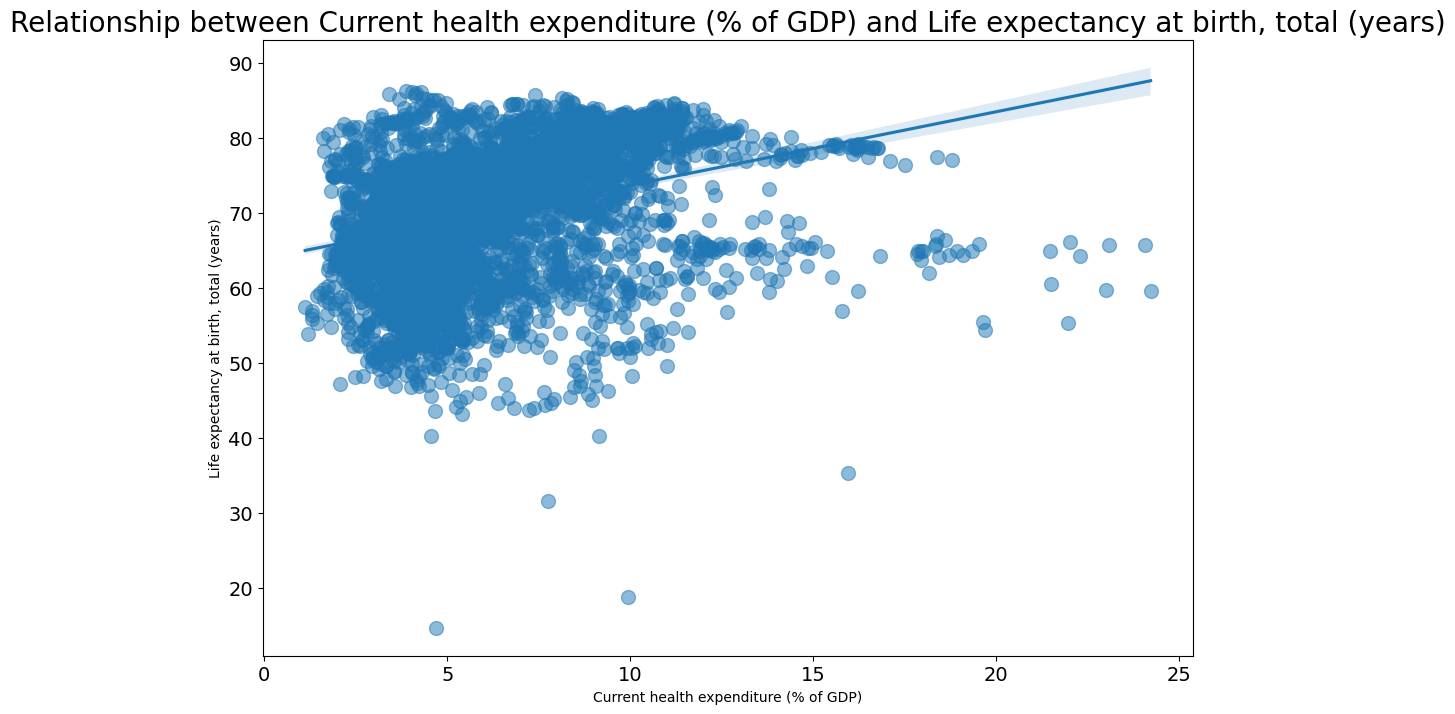

In [32]:
plt.figure(figsize=(12,8), facecolor="none")

ax = sns.regplot(data=df_plot,
                 x="Current health expenditure (% of GDP)",
                 y="Life expectancy at birth, total (years)",
                 scatter_kws={'alpha':0.5, 's':100})


plt.title("Relationship between Current health expenditure (% of GDP) and Life expectancy at birth, total (years)", fontsize=20)

ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
plt.show()

In [26]:
import plotly.express as px

fig = px.scatter(
    df_pivot,
    x="Current health expenditure (% of GDP)",
    y="Life expectancy at birth, total (years)",
    opacity=0.7,
    trendline="ols",
    trendline_color_override="white"
)

fig.update_traces(
    marker=dict(size=8)
)

fig.update_layout(
    title="Health Expenditure vs Life Expectancy",
    xaxis_title="Current health expenditure (% of GDP)",
    yaxis_title="Life expectancy at birth (years)",
    showlegend=False,
    font=dict(color="white"),
    plot_bgcolor="rgba(0,0,0,0)",
    paper_bgcolor="rgba(0,0,0,0)"
)

fig.show()


In [29]:
df_pivot['Life expectancy at birth, total (years)'].max()

86.372

In [30]:
df_pivot['Current health expenditure (% of GDP)'].max()

24.23069